# 14) The seaborn.objects interface (4)

In [1]:
import seaborn as sns
import seaborn.objects as so
import matplotlib.pyplot as plt
plt.ioff()

## Customizing the appearance

- The new interface aims to support a deep amount of customization through Plot, reducing the need to switch gears and use matplotlib functionality directly. (But please be patient; not all of the features needed to achieve this goal have been implemented!)<br><br>
- 새로운 인터페이스는 Plot을 통해 많은 양의 사용자 정의를 지원하여 기어를 전환하고 matplotlib 기능을 직접 사용할 필요성을 줄이는 것을 목표로 합니다. (하지만 기다려주십시오. 이 목표를 달성하는 데 필요한 모든 기능이 구현된 것은 아닙니다!)

### Parameterizing scales

- All of the data-dependent properties are controlled by the concept of a Scale and the Plot.scale() method. This method accepts several different types of arguments. One possibility, which is closest to the use of scales in matplotlib, is to pass the name of a function that transforms the coordinates:<br><br>
- 모든 데이터 종속 속성은 Scale 및 Plot.scale() 메서드의 개념으로 제어됩니다.이 메서드는 여러 가지 유형의 인수를 허용합니다. matplotlib에서 척도를 사용하는 것과 가장 가까운 한 가지 가능성은 좌표를 변환하는 함수의 이름을 전달하는 것입니다.

In [2]:
diamonds = sns.load_dataset('diamonds')
diamonds.shape

(53940, 10)

In [3]:
diamonds.head()

carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75

In [4]:
plot1 = so.Plot(
    diamonds,
    x='carat',
    y='price'
)

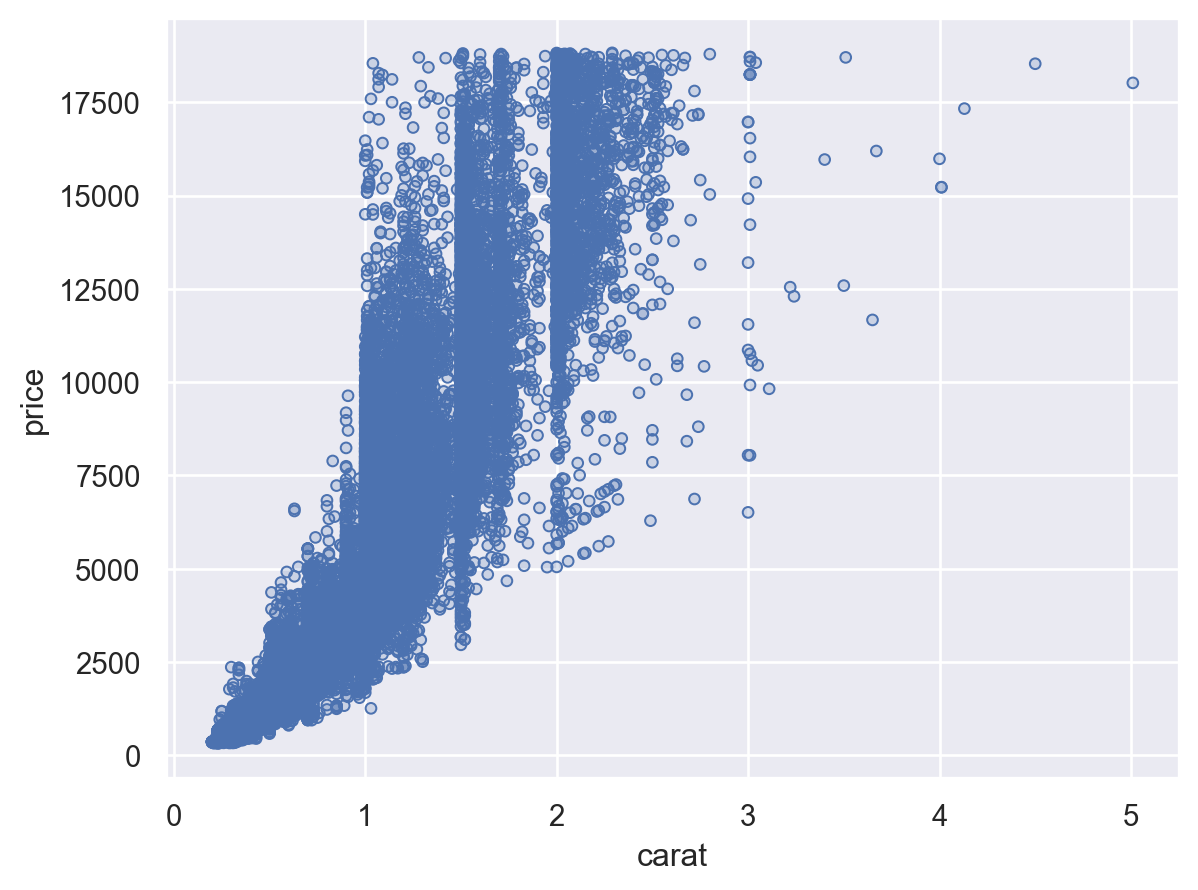

In [10]:
layer11 = plot1.add(
    so.Dots()
)
layer11

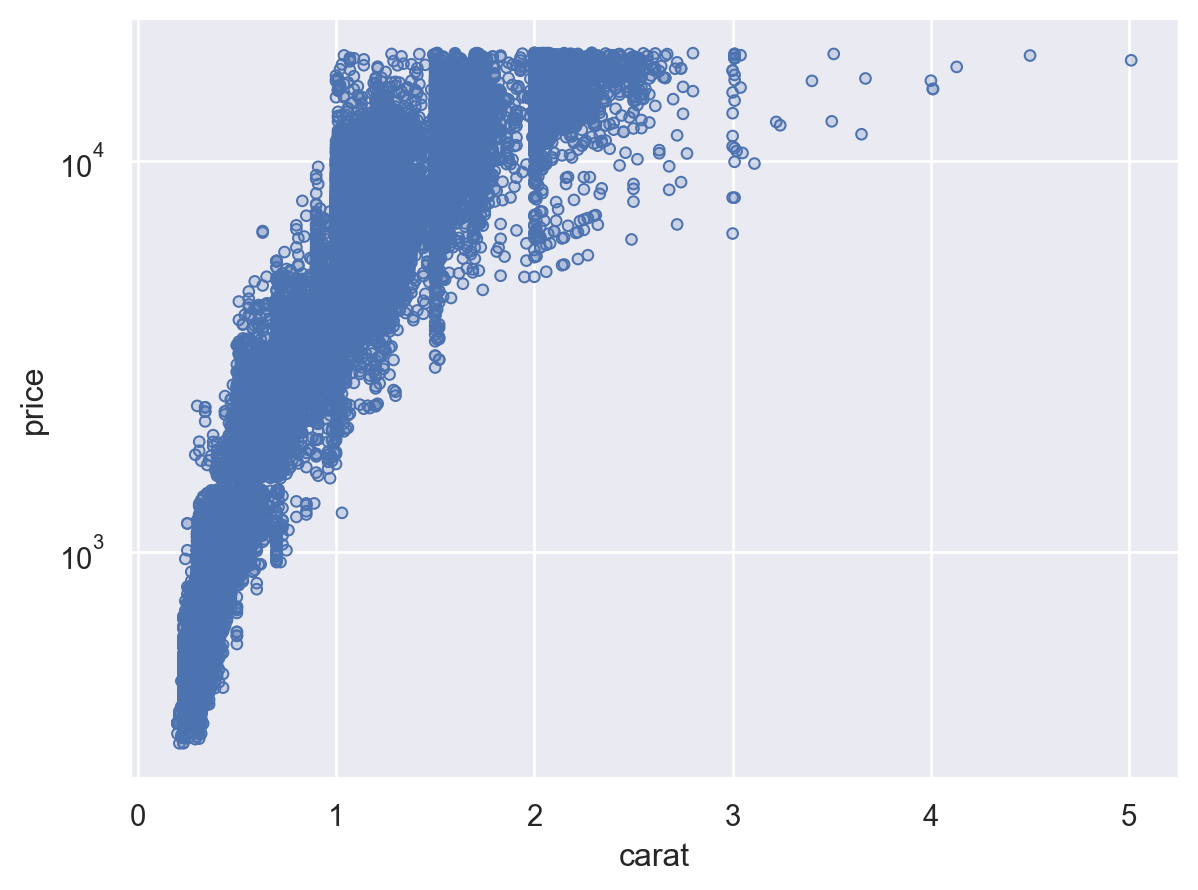

In [11]:
layer12 = layer11.scale(
    y='log'
)
layer12

- Plot.scale() can also control the mappings for semantic properties like color. You can directly pass it any argument that you would pass to the palette parameter in seaborn’s function interface:<br><br>
- Plot.scale()은 또한 색상과 같은 의미론적 속성에 대한 매핑을 제어할 수 있습니다. seaborn의 함수 인터페이스에서 팔레트 매개변수에 전달할 모든 인수를 직접 전달할 수 있습니다.

In [12]:
plot2 = so.Plot(
    diamonds,
    x='carat',
    y='price',
    color='clarity'
)

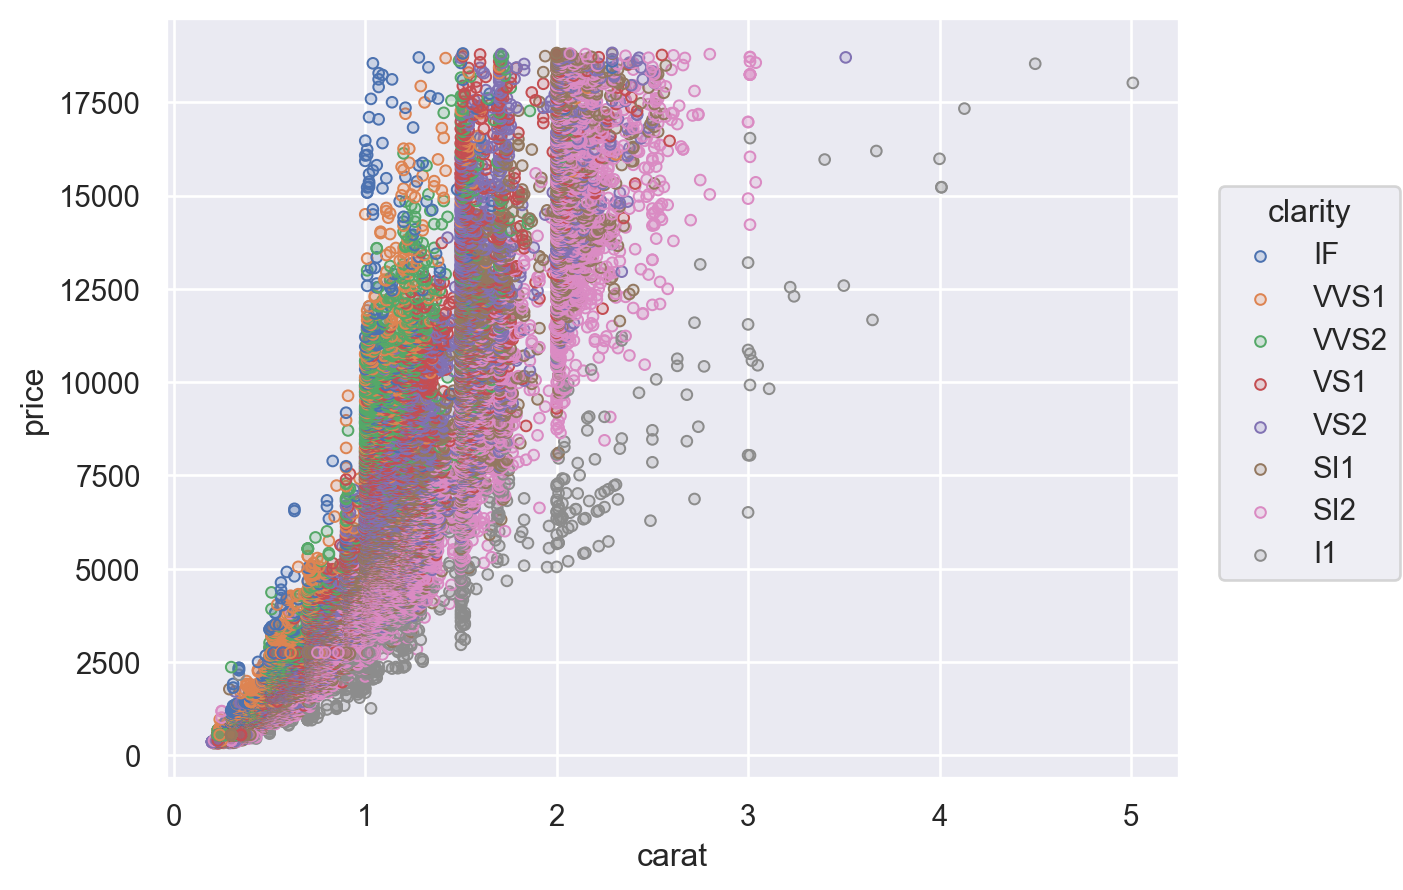

In [13]:
layer21 = plot2.add(
    so.Dots()
)
layer21

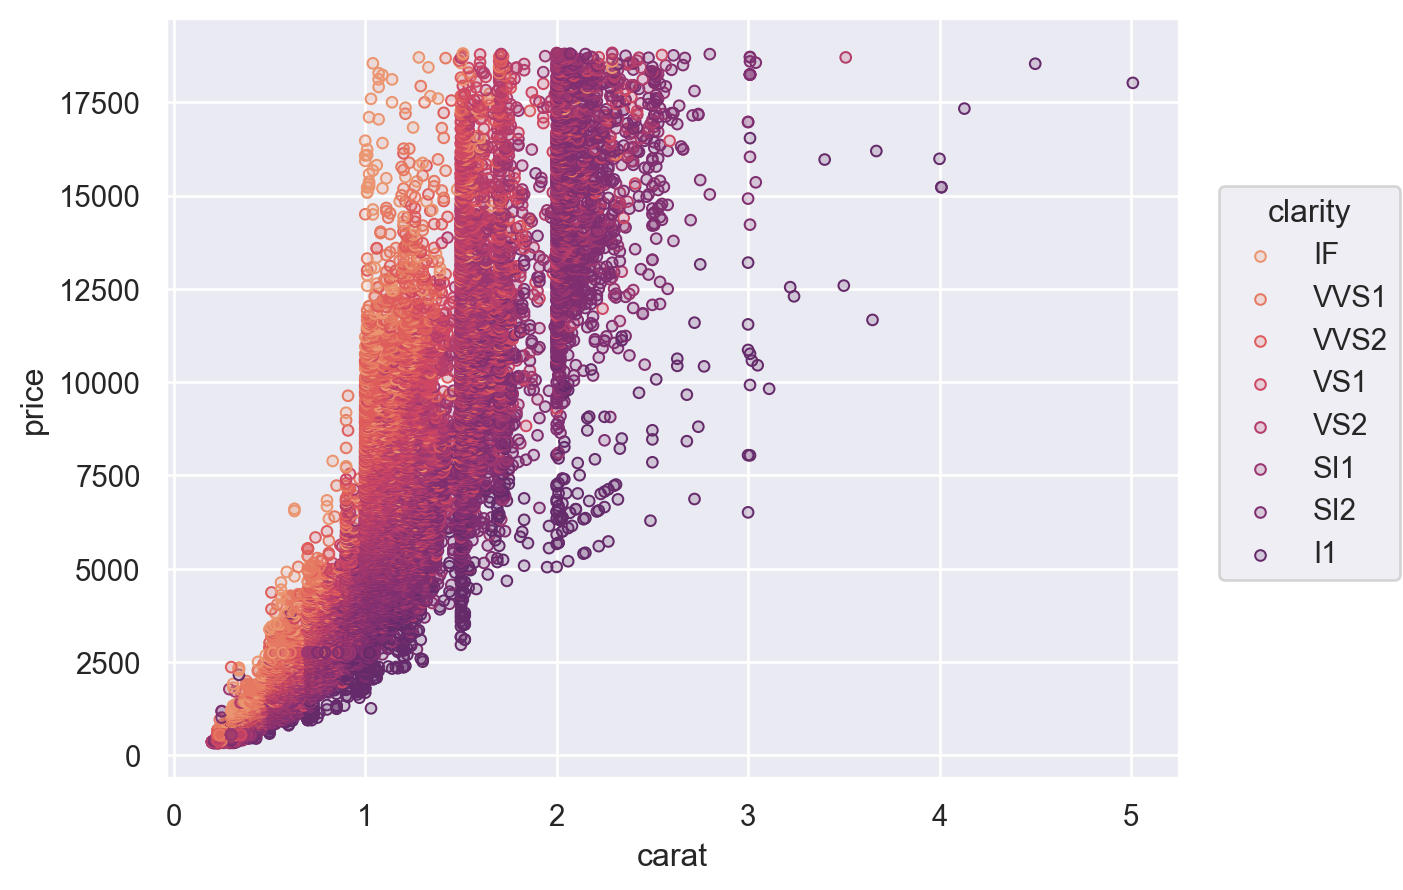

In [14]:
layer22 = layer21.scale(
    color='flare'
)
layer22

- Another option is to provide a tuple of (min, max) values, controlling the range that the scale should map into. This works both for numeric properties and for colors:<br><br>
- 또 다른 옵션은 척도가 매핑되어야 하는 범위를 제어하는 ​​(최소, 최대) 값의 튜플을 제공하는 것입니다. 이는 숫자 속성과 색상 모두에 적용됩니다.

In [15]:
plot3 = so.Plot(
    diamonds,
    x='carat',
    y='price',
    color='clarity',
    pointsize='carat'
)

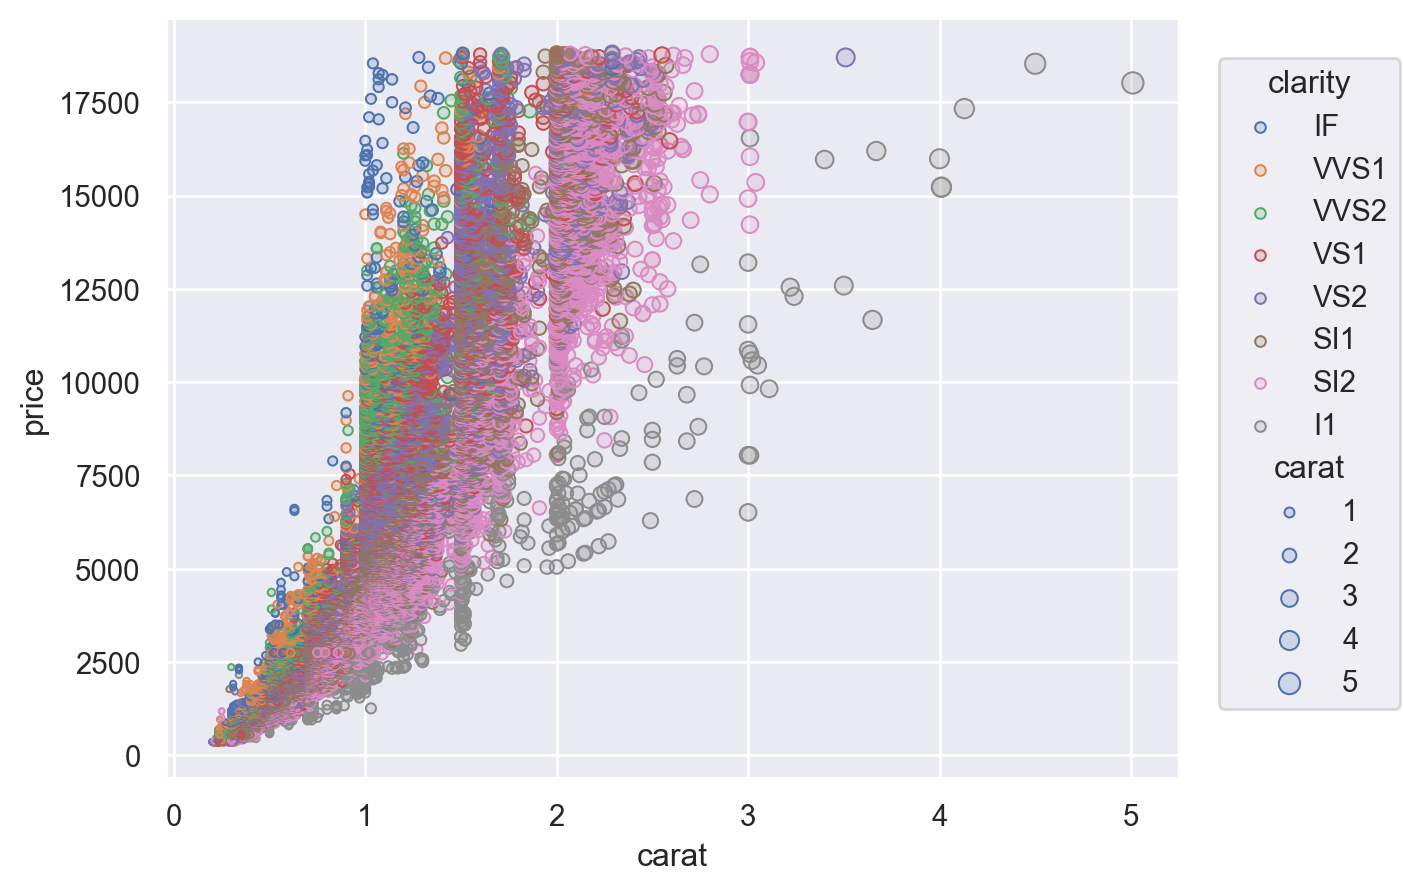

In [16]:
layer31 = plot3.add(
    so.Dots()
)
layer31

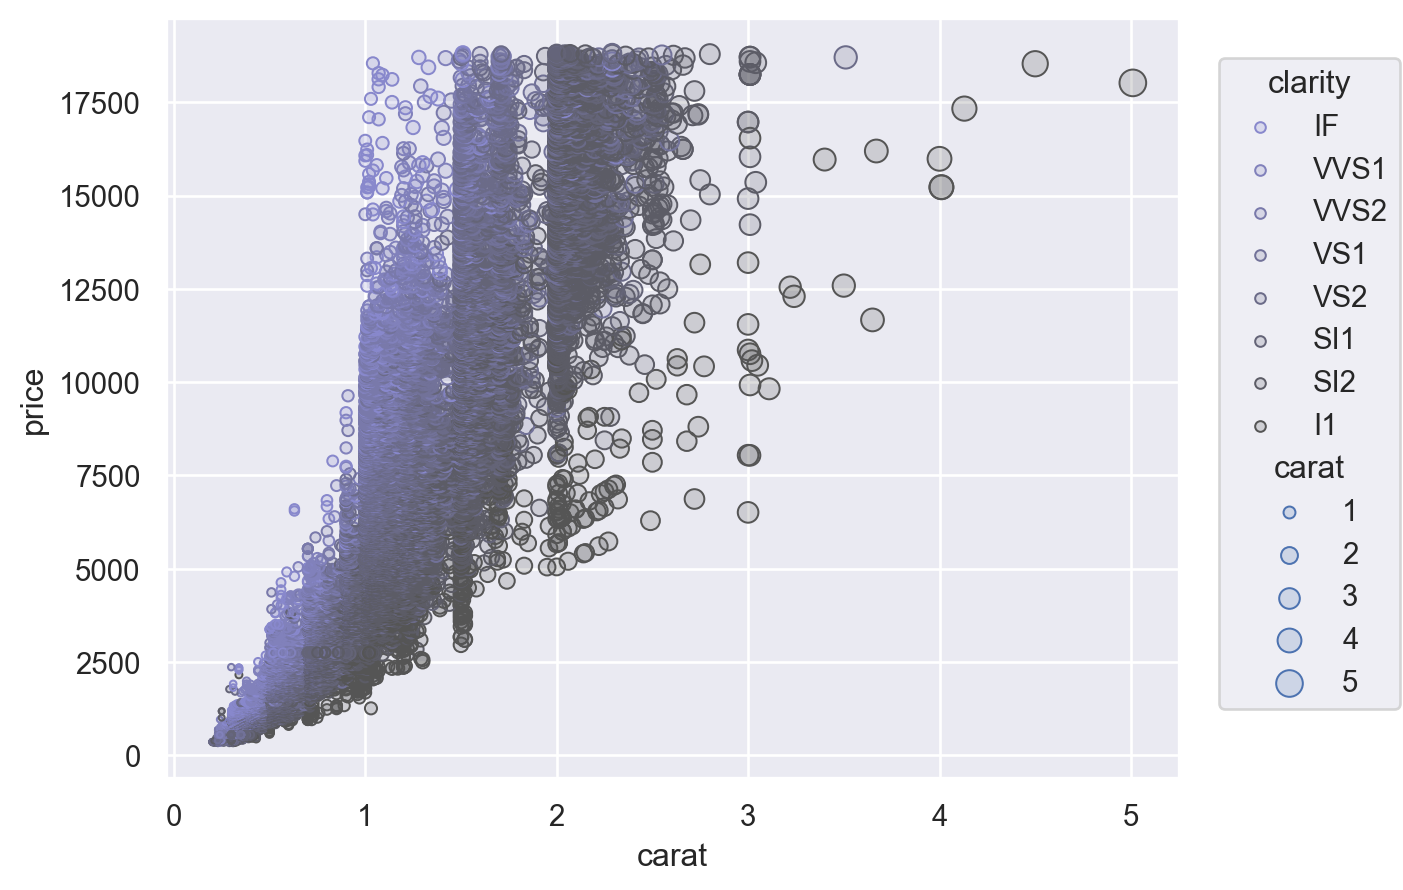

In [18]:
layer32 = layer31.scale(
    color=('#88c', '#555'),
    pointsize=(2, 10)
)
layer32

- For additional control, you can pass a Scale object. here are several different types of Scale, each with appropriate parameters. For example, Continuous lets you define the input domain (norm), the output range (values), and the function that maps between them (trans), while Nominal allows you to specify an ordering:<br><br>
- 추가 제어를 위해 Scale 개체를 전달할 수 있습니다. 다음은 각각 적절한 매개변수가 있는 다양한 유형의 스케일입니다. 예를 들어 Continuous를 사용하면 입력 도메인(norm), 출력 범위(values) 및 이들 사이에 매핑되는 함수(trans)를 정의할 수 있으며 Nominal을 사용하면 순서를 지정할 수 있습니다.

In [23]:
plot4 = so.Plot(
    diamonds,
    x='carat',
    y='price',
    color='carat',
    marker='cut'
)

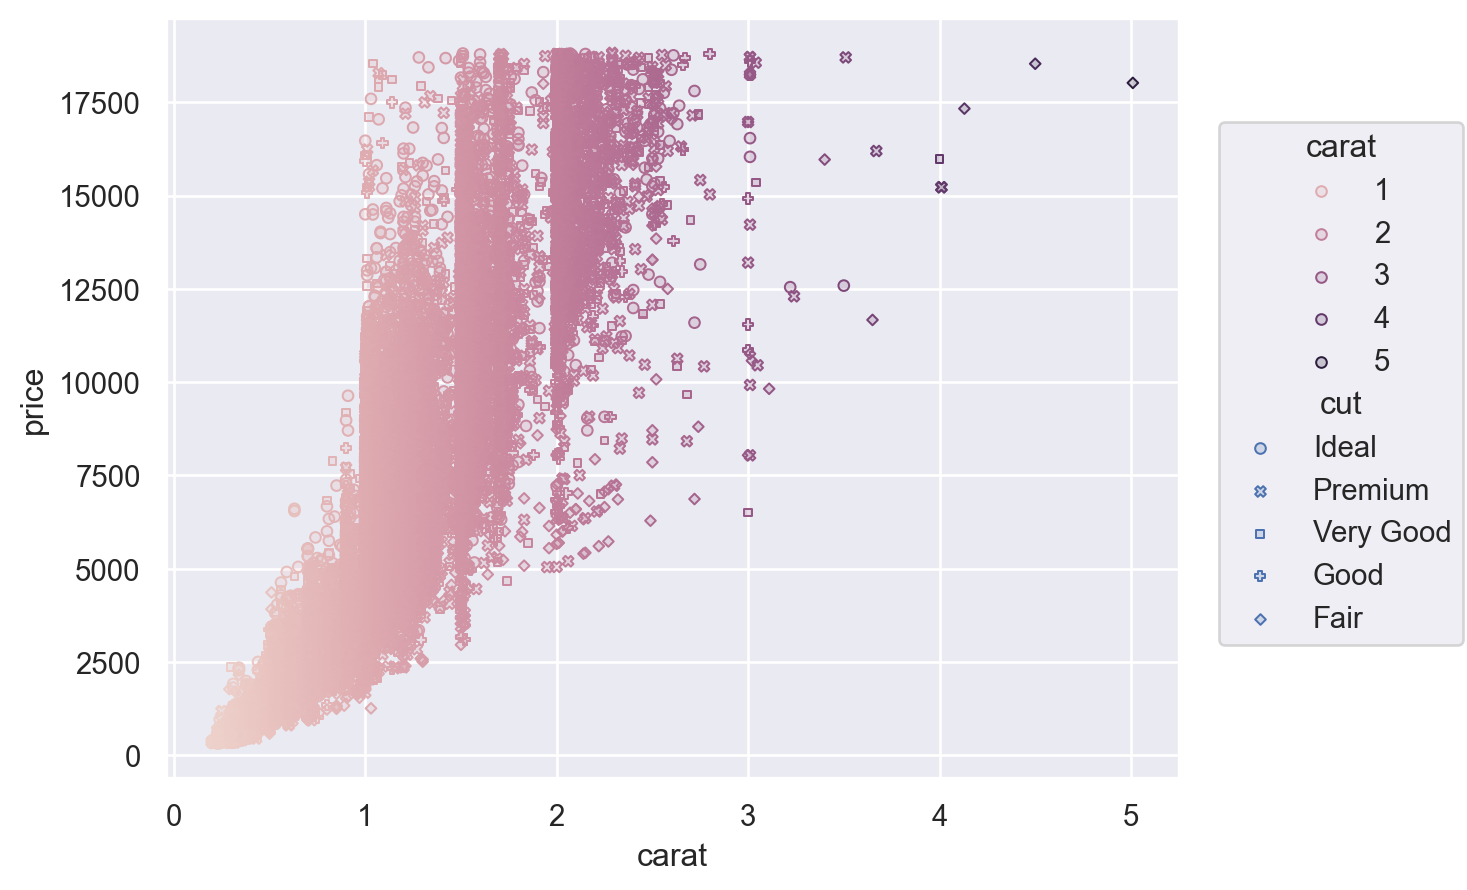

In [24]:
layer41 = plot4.add(
    so.Dots()
)
layer41

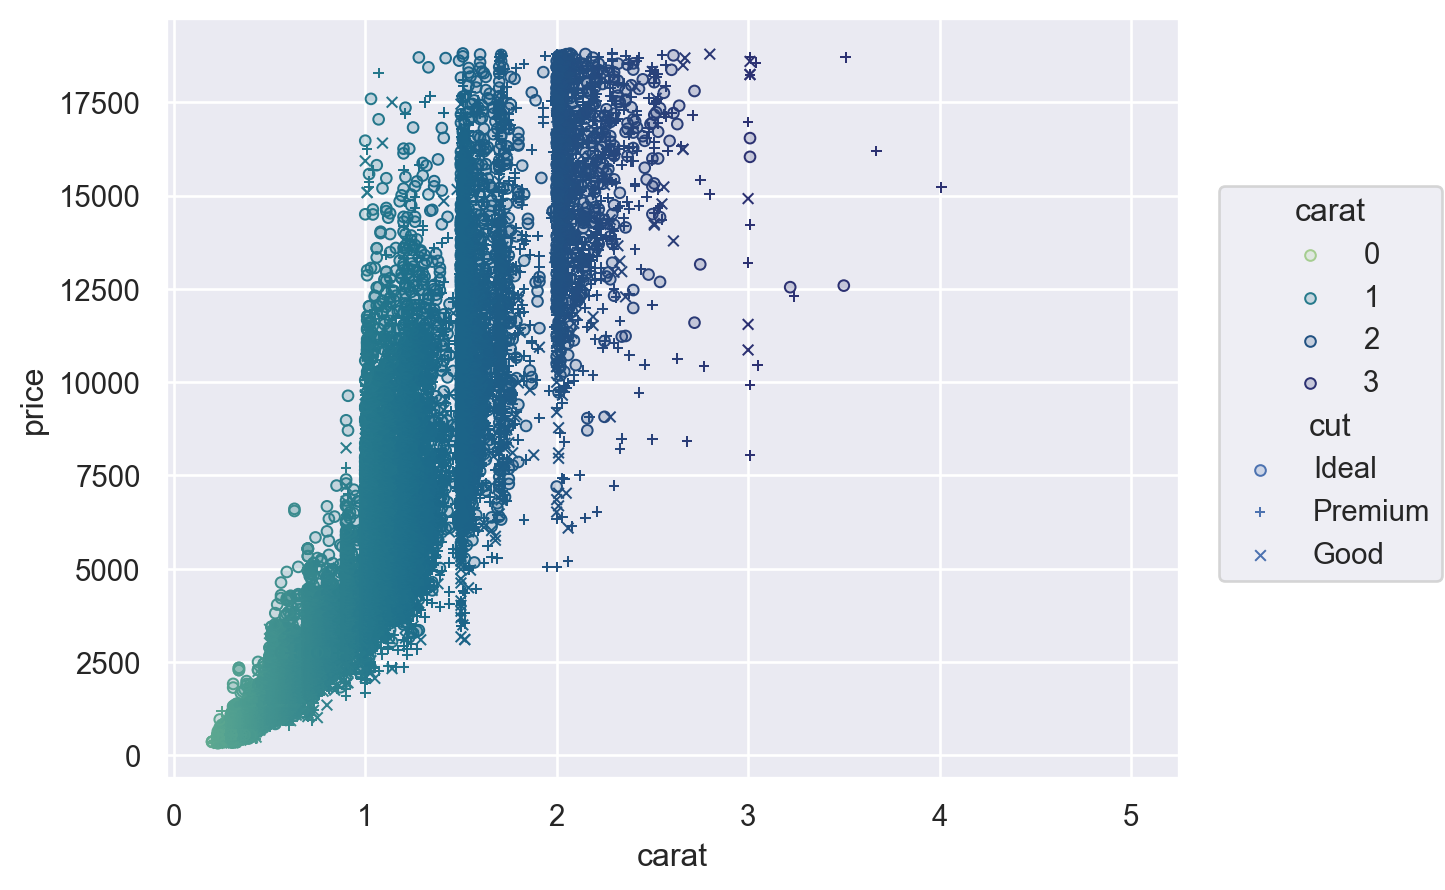

In [26]:
layer42 = layer41.scale(
    color=so.Continuous(
        'crest',
        norm=(0, 3),
        trans='sqrt'
    ),
    marker=so.Nominal(
        ['o', '+', 'x'],
        order=['Ideal', 'Premium', 'Good']
    )
)
layer42

### Customizing legends and ticks

- The Scale objects are also how you specify which values should appear as tick labels / in the legend, along with how they appear. For example, the Continuous.tick() method lets you control the density or locations of the ticks, and the Continuous.label() method lets you modify the format:<br><br>
- Scale 개체는 표시되는 방식과 함께 범례에서 눈금 레이블로 표시되어야 하는 값을 지정하는 방법이기도 합니다. 예를 들어, Continuous.tick() 메서드를 사용하면 눈금의 밀도나 위치를 제어할 수 있고 Continuous.label() 메서드를 사용하면 형식을 수정할 수 있습니다.

In [27]:
plot5 = so.Plot(
    diamonds,
    x='carat',
    y='price',
    color='carat'
)

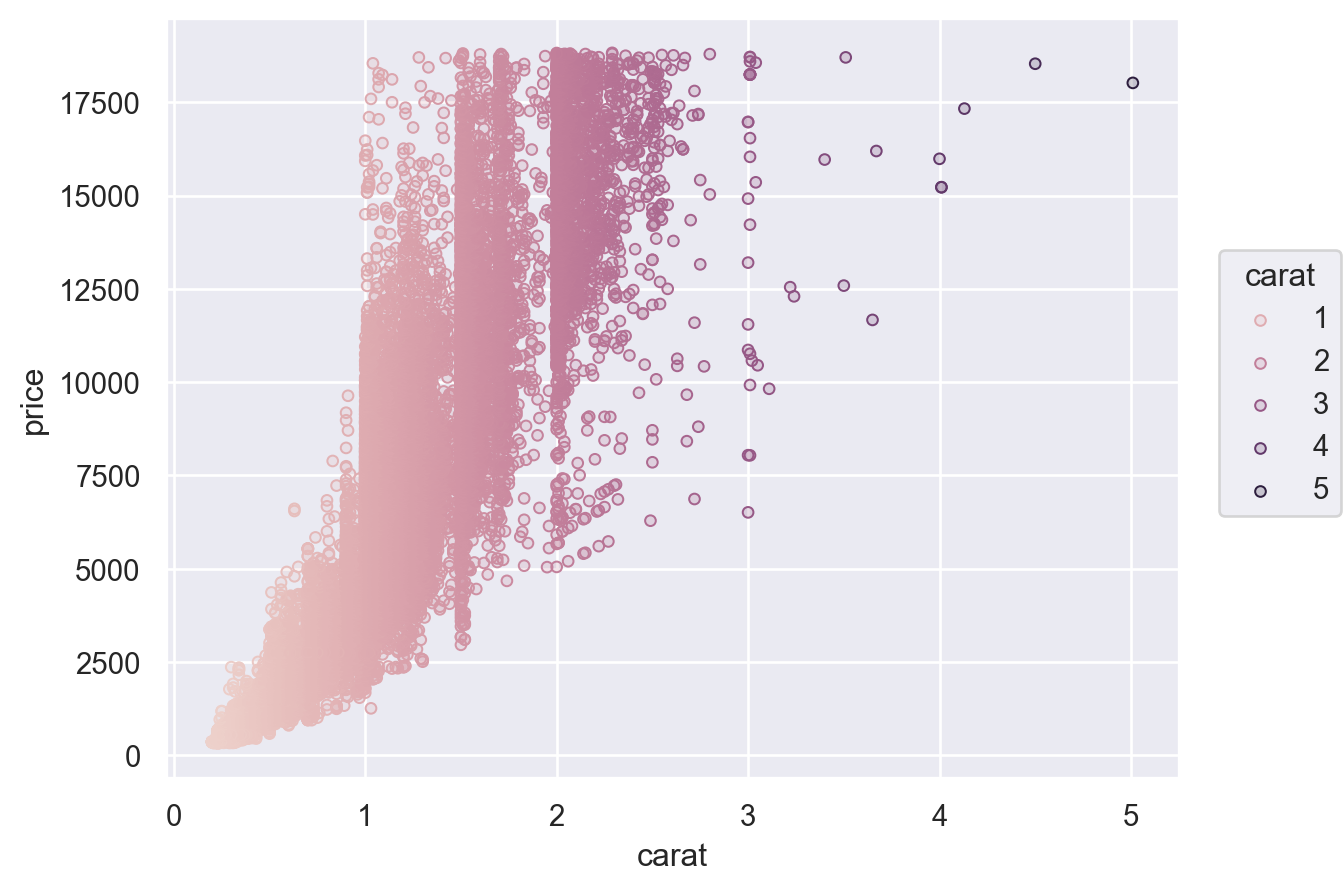

In [28]:
layer51 = plot5.add(
    so.Dots()
)
layer51

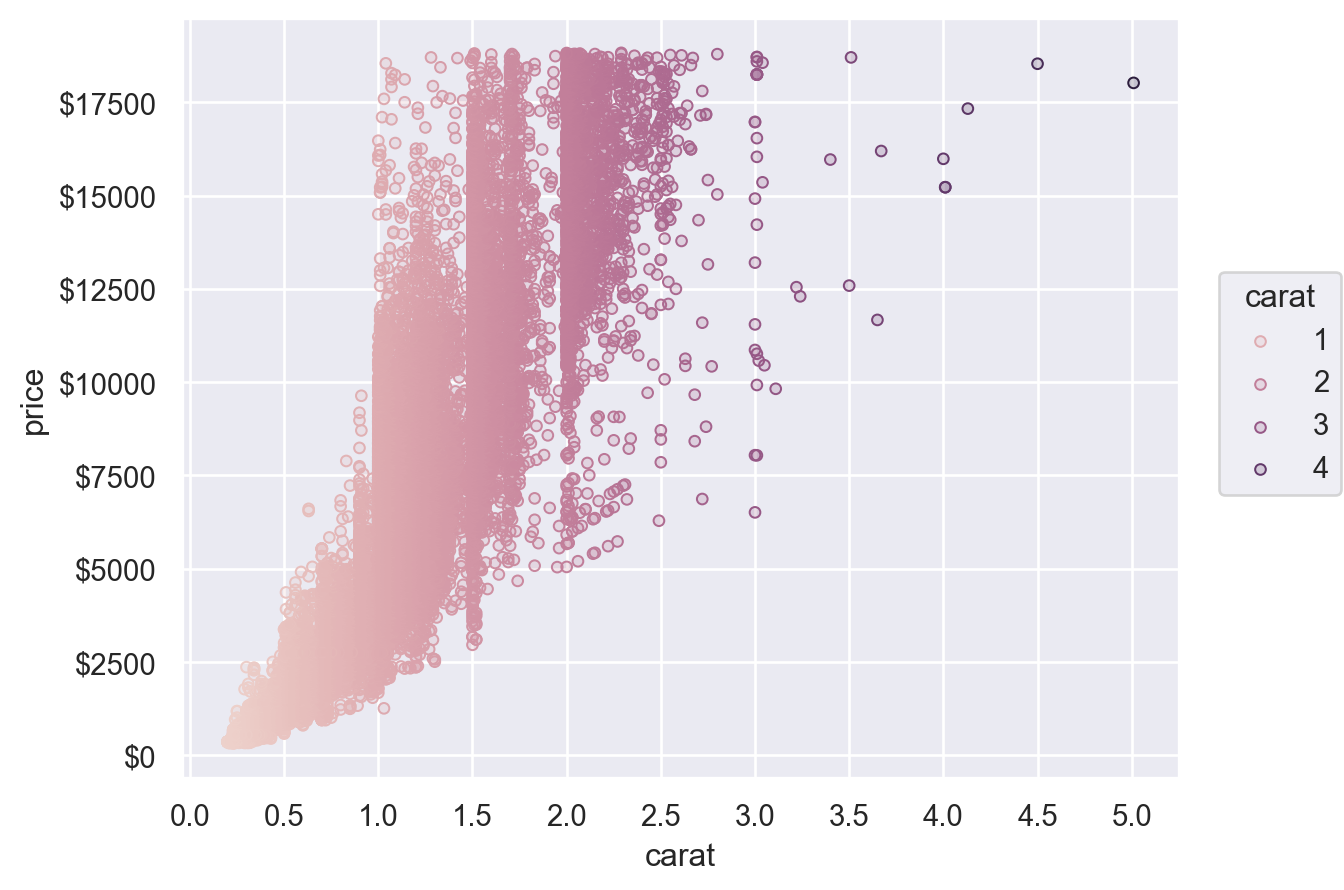

In [31]:
layer52 = layer51.scale(
    x=so.Continuous().tick(every=0.5),
    y=so.Continuous().label(like='${x:.0f}'),
    color=so.Continuous().tick(at=[1, 2, 3, 4])
)
layer52

### Customizing limits, labels, and titles

- Plot has a number of methods for simple customization, including Plot.label(), Plot.limit(), and Plot.share():<br><br>
- Plot에는 Plot.label(), Plot.limit() 및 Plot.share()를 포함하여 간단한 사용자 지정을 위한 여러 메서드가 있습니다.


In [33]:
penguins = sns.load_dataset('penguins')
penguins.shape

(344, 7)

In [34]:
penguins.head()

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female

In [35]:
plot6 = so.Plot(
    penguins,
    x='body_mass_g',
    y='species',
    color='island'
)

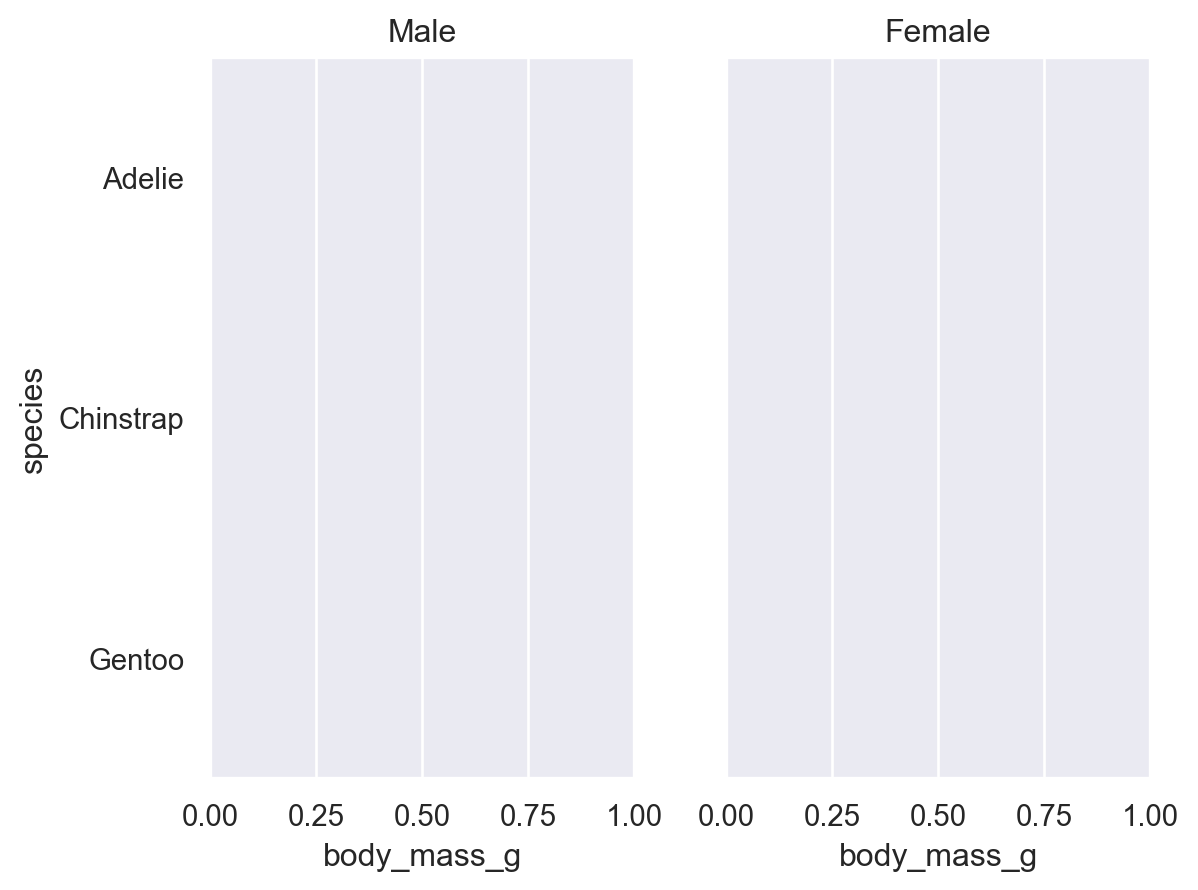

In [36]:
plot6.facet(
    col='sex'
)

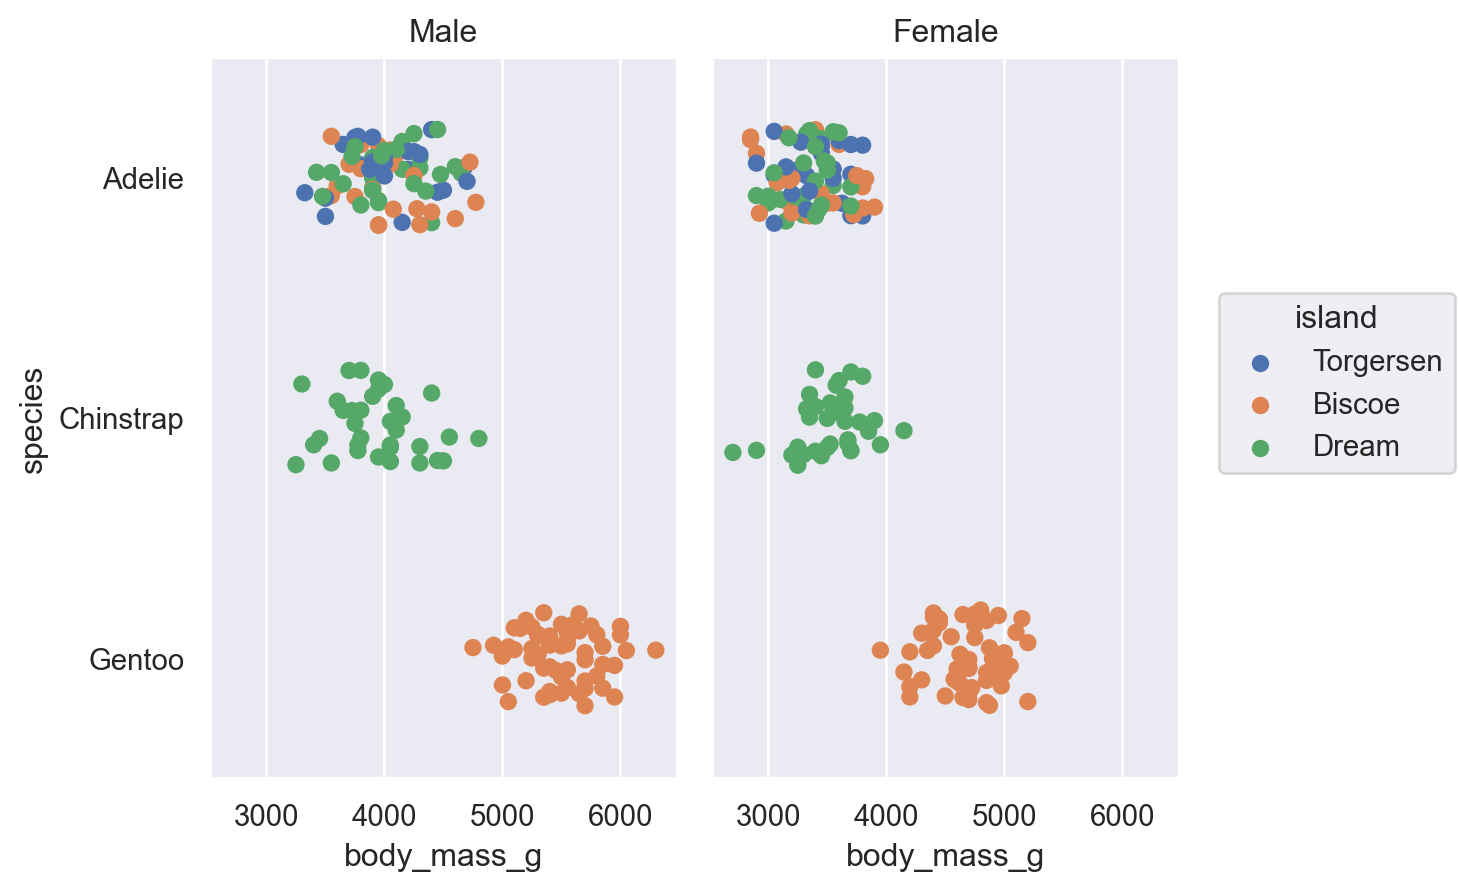

In [43]:
plot6.facet(
    col='sex'
).add(
    so.Dot(),
    so.Jitter(.5)
)

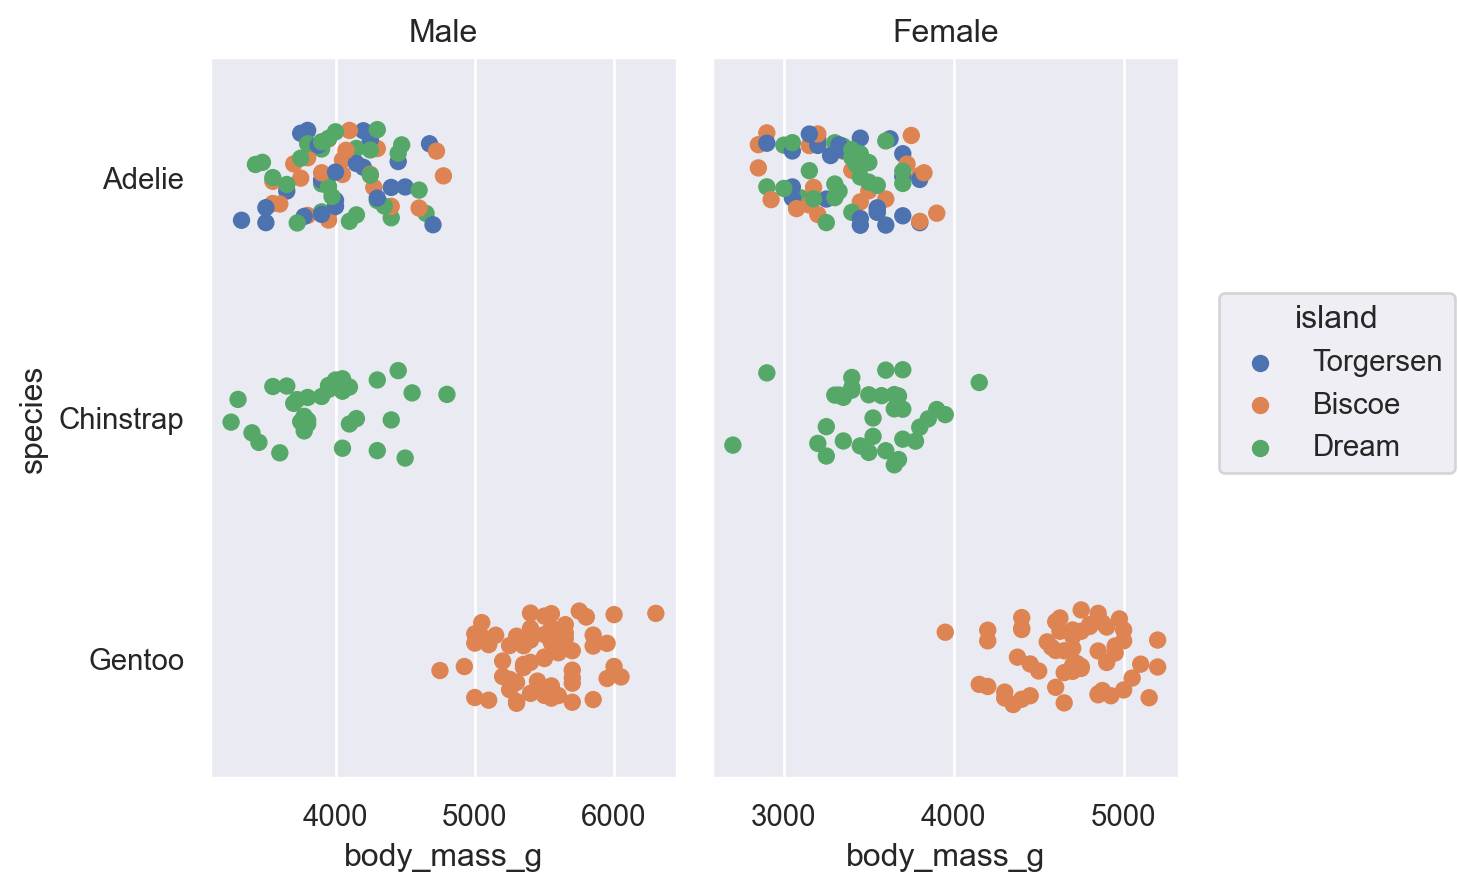

In [44]:
plot6.facet(
    col='sex'
).add(
    so.Dot(),
    so.Jitter(.5)
).share(
    x=False
)

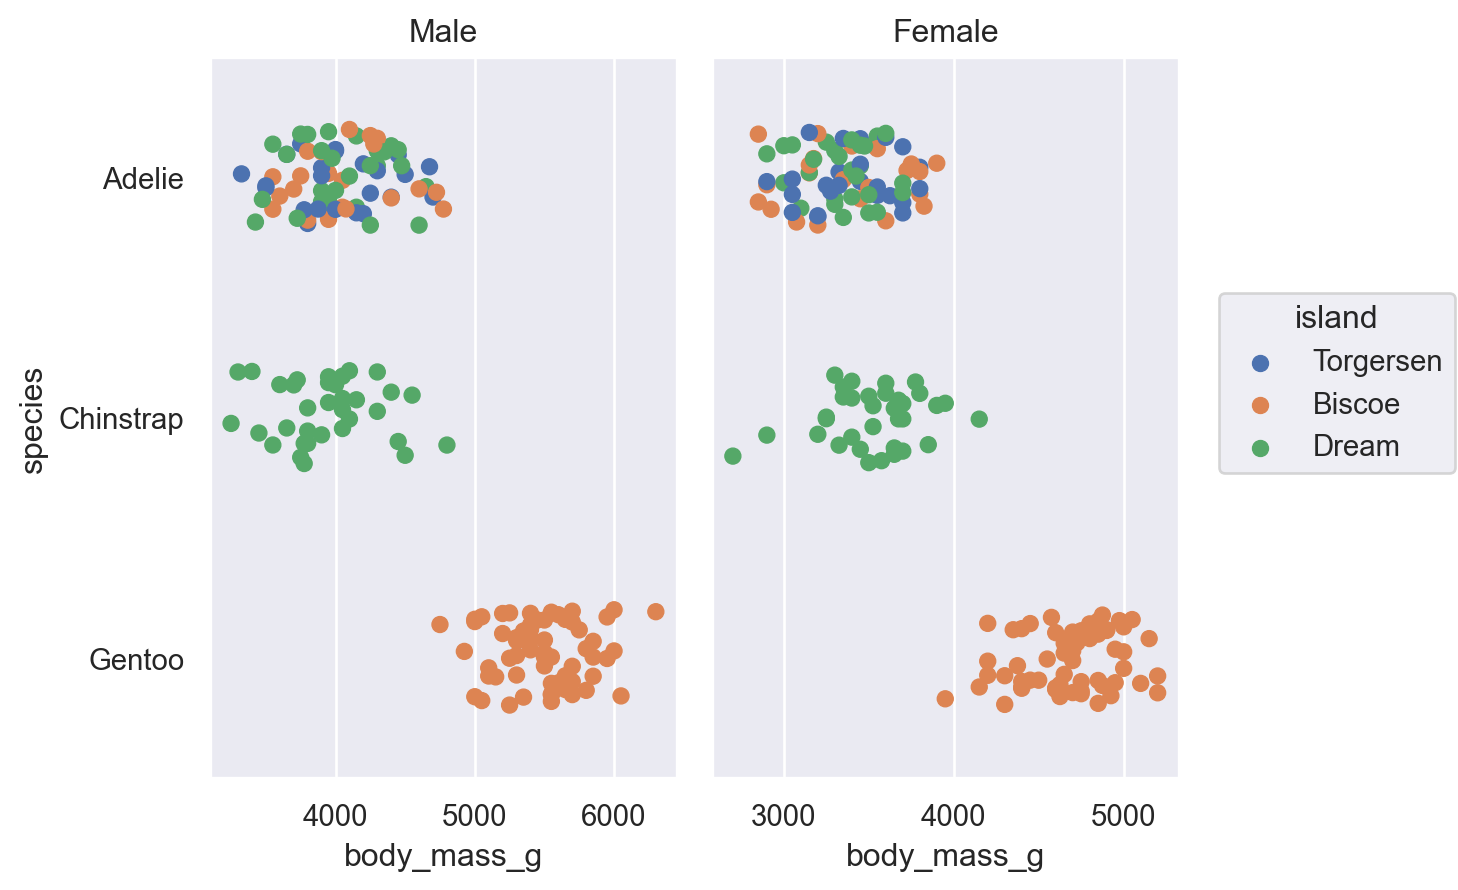

In [45]:
plot6.facet(
    col='sex'
).add(
    so.Dot(),
    so.Jitter(.5)
).share(
    x=False
).limit(
    y=(2.5, -.5)
)

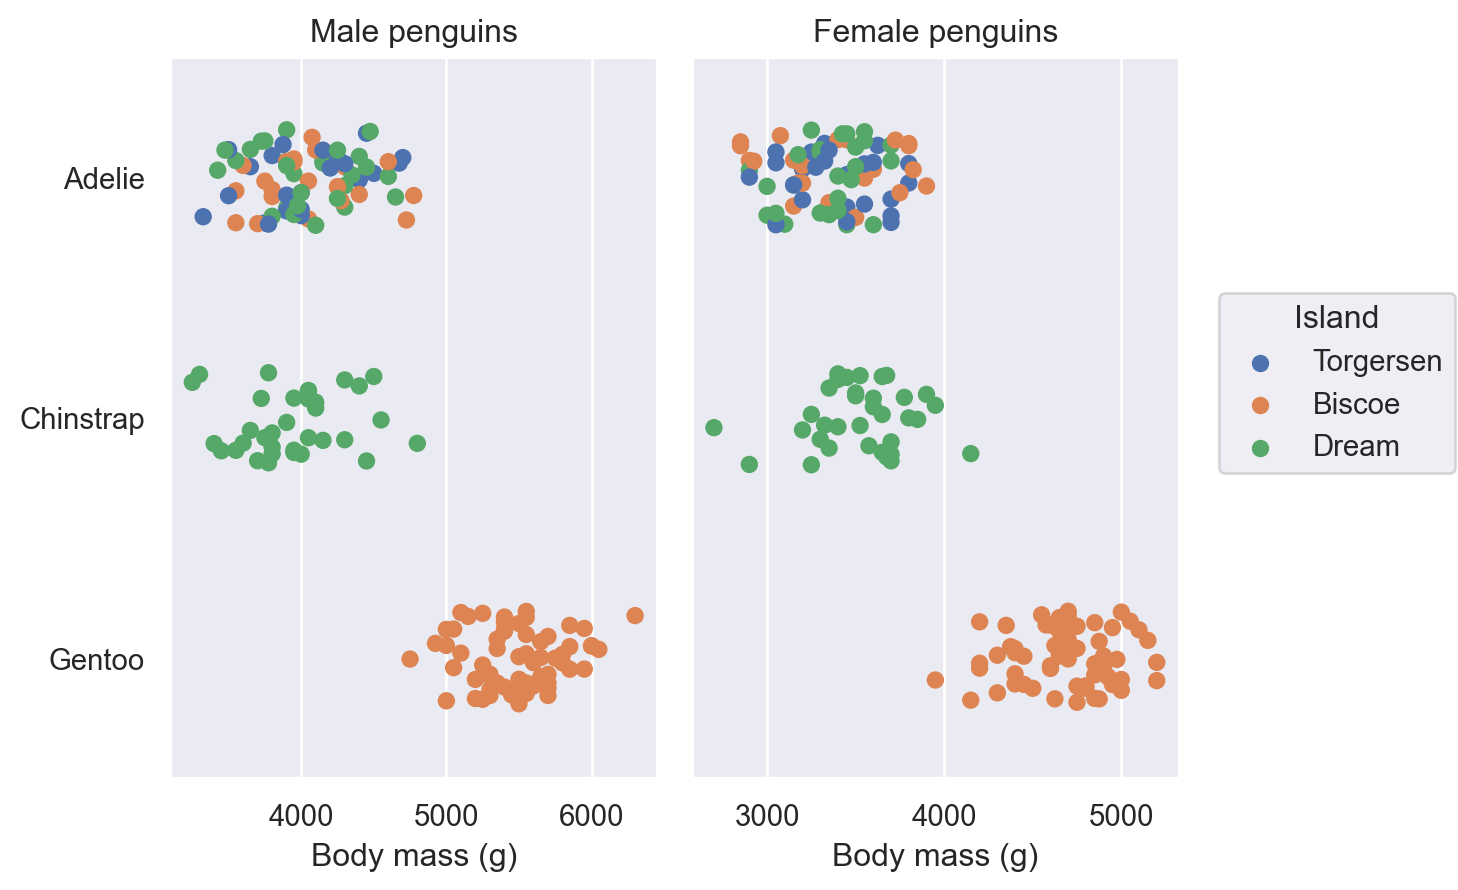

In [46]:
plot6.facet(
    col='sex'
).add(
    so.Dot(),
    so.Jitter(.5)
).share(
    x=False
).limit(
    y=(2.5, -.5)
).label(
    x='Body mass (g)',
    y='',
    color=str.capitalize,
    title='{} penguins'.format
)

### Theme customization

- Finally, Plot supports data-independent theming through the Plot.theme method. Currently, this method accepts a dictionary of matplotlib rc parameters. You can set them directly and/or pass a package of parameters from seaborn’s theming functions: <br><br>
- 마지막으로 Plot은 Plot.theme 메서드를 통해 데이터 독립적인 테마 지정을 지원합니다. 현재 이 메서드는 matplotlib rc 매개변수 사전을 허용합니다. 직접 설정하거나 seaborn의 테마 기능에서 매개변수 패키지를 전달할 수 있습니다.

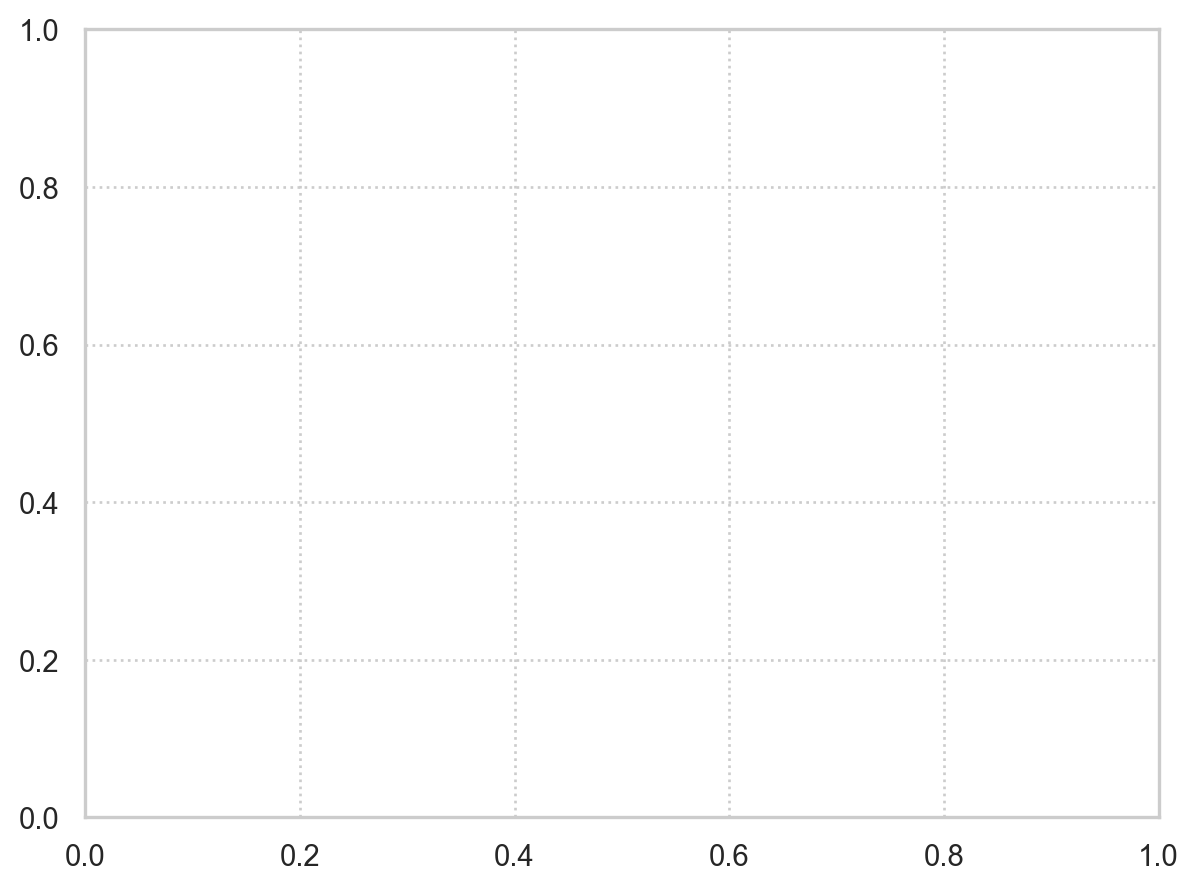

In [47]:
from seaborn import axes_style
so.Plot().theme(
    {
        **axes_style('whitegrid'), 
        'grid.linestyle': ':'
    }
)